# A.3.1: Pharmacokinetics

$c(t) = f \times \frac{D}{V} \times \frac{k_a}{k_a - k_e} \times (e^{-k_et}) - (e^{-k_at}) $

### 1. Please explain the difference of this Bateman equation and the variant given in the lecture.
The difference is, that this formula has $f \times \frac{D}{V}$ instead of $c_0$. This version of the formula includes a little more information, instead of "hiding" that information in the constant $c_0$. $f \times \frac{D}{V}$ describes how much of the initial drug concentration reaches the systematic circulation at time zero, depending on the space it goes into. Here, D is the Dose, f the bioavailability, and V is the volumne of distribution.

### 2. Please explain the pharmacological concept of bioavailability briefly.
Bioavailability is a pharmacokinetic parameter that describes the proportion of an administered drug that reaches the systemic circulation. 

### 3. Please implement the Bateman equation from above in Python and generate a plot that shows the implemented function in a reasonable time frame when using the given parameters.

In [7]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 226.4 kB/s eta 0:00:00a 0:00:02
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 905.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 695.4 kB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [8]:
def bateman_equation(f, D, V, k_a, k_e, t):
    c_0 = f * (D/V)
    c = c_0 * (k_a/(k_a-k_e)) * (np.exp(-k_e*t) - np.exp(-k_a*t))
    return c

In [9]:
# Given Parameters
f = 0.4
D = 25 # mg
V = 1 # l
k_a = 5.3 * pow(10, -2) # 1/s
k_e = 7.9 * pow(10, -3) # 1/s
# Define a time frame over 5 hours
t = np.linspace(0, 18000, 1000) # 18000 seconds = 5 hours --> 5h * 60min * 60s = 18000

In [10]:
# Compute the drug concentrations for each time point
c_t = bateman_equation(f, D, V, k_a, k_e, t)

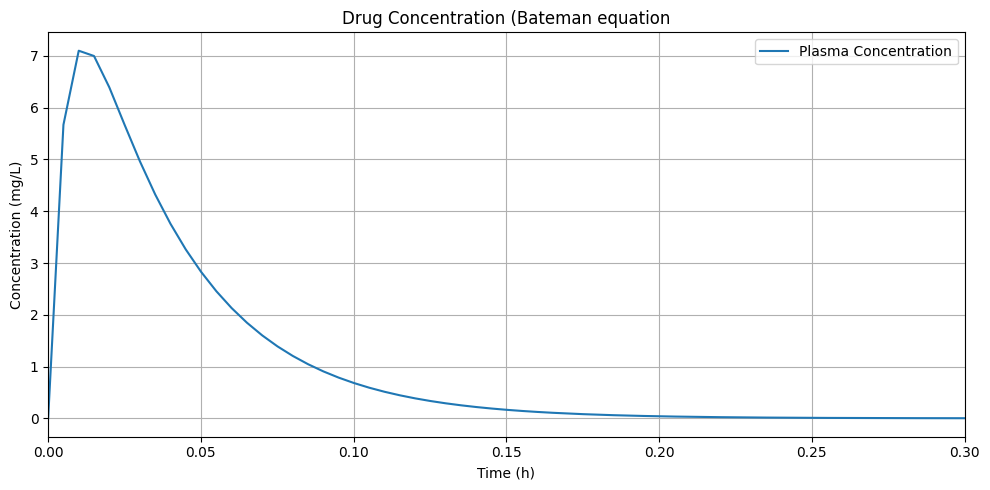

In [16]:
# Plot result
plt.figure(figsize=(10, 5))
plt.plot(t/3600, c_t, label='Plasma Concentration')
plt.xlim(0,0.3)
plt.xlabel('Time (h)')
plt.ylabel('Concentration (mg/L)')
plt.title('Drug Concentration (Bateman equation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 4. Also important in this context is the so-called first pass effect. Please explain the latter briefly.
The first pass effect describes the metabolism of a drug before it reaches the systematic circulation, especially the enzymatic breakdown of a drug in the liver and/or gut wall. This happens after absorption but before entering the bloodstream and can therefore reduce the effective concentration of a drug. This can be an issue for some drugs that are affected by an extensive first-pass metabolism. 

### 5. A patient needs to take the drug from 3.1.3. orally. In addition to the disease the drug is prescribed for the patient suffers from severe liver disease. Which model parameter might change because if the latter disease and why? Change this parameter in your script appropriately and plot the result.
The bioavailability parameter would be affected. For patients with liver disease the first-pass metabolism is reduced, because the livers ability to metabolize a drug before entering the blood is impaired. This means, more of the drug enters the systematic circulation of the patient, which leads to an increased f. As a rough estimate we decided to double the bioavailability parameter f to a value of 0.8.

In [17]:
# Earlier Parameters with a f value adjusted for a patient with liver disease
f_liver_disease = 0.8
D = 25 # mg
V = 1 # l
k_a = 5.3 * pow(10, -2) # 1/s
k_e = 7.9 * pow(10, -3) # 1/s
# Define a time frame over 5 hours
t = np.linspace(0, 18000, 1000) # 86400 seconds = 5 hours --> 5h * 60min * 60s = 18000

In [18]:
# Compute the drug concentrations for each time point
c_liver_disease = bateman_equation(f_liver_disease, D, V, k_a, k_e, t)

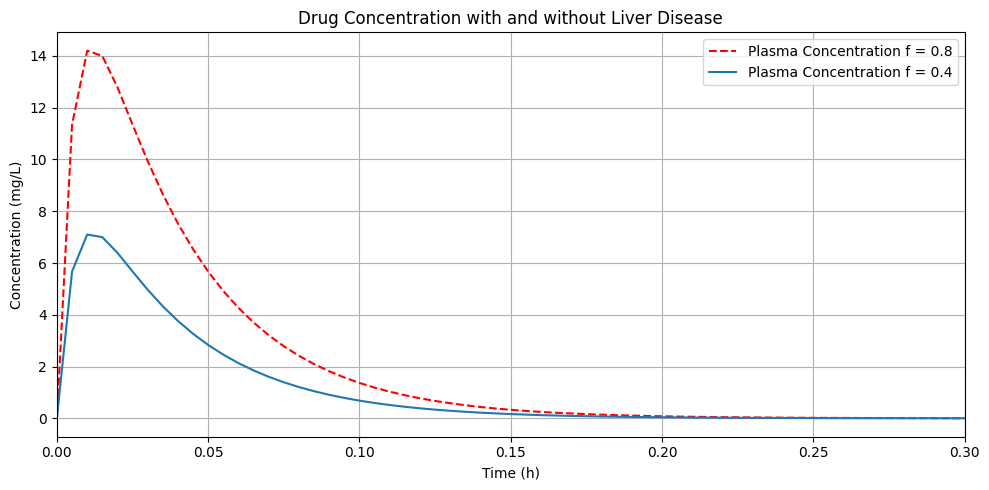

In [21]:
# Plot result
plt.figure(figsize=(10, 5))
plt.plot(t/3600, c_liver_disease, label='Plasma Concentration f = 0.8', linestyle='--', color="red")
plt.plot(t/3600, c_t, label='Plasma Concentration f = 0.4')
plt.xlim(0,0.3)
plt.xlabel('Time (h)')
plt.ylabel('Concentration (mg/L)')
plt.title('Drug Concentration with and without Liver Disease')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 6. Based on your results from the previous task, what recommendations would you give in the package insert for such patients?
We would probably recommend that patients with liver disease should not take this drug, since it might be toxic or has unwanted effects if this drug has a increased concentration in the systematic circulation of a patient. One could consider to suggest a drug for this patient, that does not take the oral route and is therefore not affected by the first-pass effect.

Another suggestion could be to take a lesser dose of the drug or change the frequency of administration. 